In [1]:
import random
import warnings
from typing import Callable, Union

import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from numpy.typing import NDArray
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler


TEST_SPLIT = 0.2
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, n_features=2, centers=2)

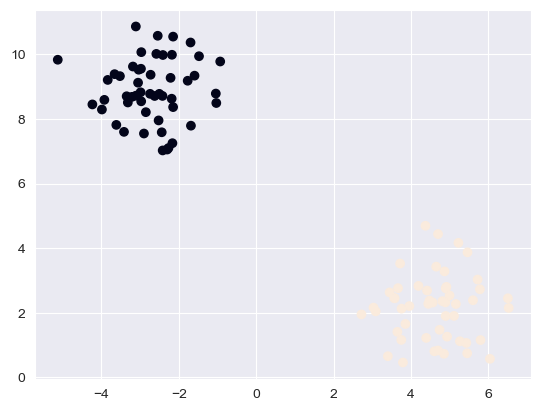

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:, 0], y=x[:, 1], c=y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

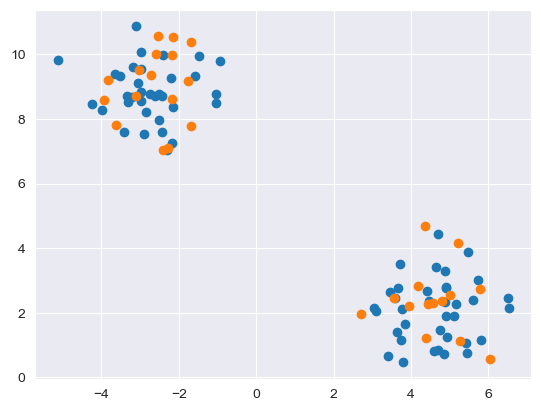

In [5]:
plt.scatter(x=x_train[:, 0], y=x_train[:, 1])
plt.scatter(x=x_test[:, 0], y=x_test[:, 1])

In [6]:
def euclidean_metric(x: np._typing.NDArray, y: np._typing.NDArray) -> float:
    return np.sqrt(np.sum((x - y)**2, axis=1))

In [65]:
def basic_weights(dists):
    return np.ones_like(dists)

def bicubic_weights(dists):
    return (1. - dists)**2 / dists.max()

In [74]:
class KNNClassifier:
    def __init__(self, k: int = 1, dist_fun=euclidean_metric, weights_fun=basic_weights):
        self.k = k
        self.weights_fun = weights_fun
        self.dist_fun = dist_fun
        
        self.x = None
        self.y = None
        
    def fit(self, x_train: np._typing.NDArray, y_train: np._typing.NDArray):
        self.x = x_train
        self.y = y_train
        
    def predict(self, x_test: np._typing.NDArray):
        dists = np.zeros((len(x_test), len(self.x)))
        classes = np.zeros((len(x_test), 1))
        dist_span = np.zeros((len(x_test), self.k))
        
        for i, x in enumerate(x_test):
            dists[i] = self.dist_fun(x, self.x)
        
        ind_span = np.argsort(dists, axis=1)[:, 1:self.k + 1]
        x_span = self.x[ind_span]
        for i in range(len(x_span)):
            dist_span[i] = dists[i, ind_span[i]]
        weights = self.weights_fun(dist_span)
        for i, x in enumerate(x_test):
            labels = {l: 0 for l in self.y.unique()}
            for label in labels.keys():
                class_c =
                classes[i] = np.argmax(np.bincount(np.round((self.y[ind_span[i]].astype(float) * weights[i]))))
        
        return classes
        
        

In [75]:
knn = KNNClassifier(k=6, weights_fun=bicubic_weights)

In [76]:
y_test.mean()

0.4666666666666667

In [77]:
knn.fit(x_train, y_train)

In [78]:
preds = knn.predict(x_test)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [79]:
((preds.ravel() == y_test.ravel()).sum()) / len(y_test)

0.5333333333333333

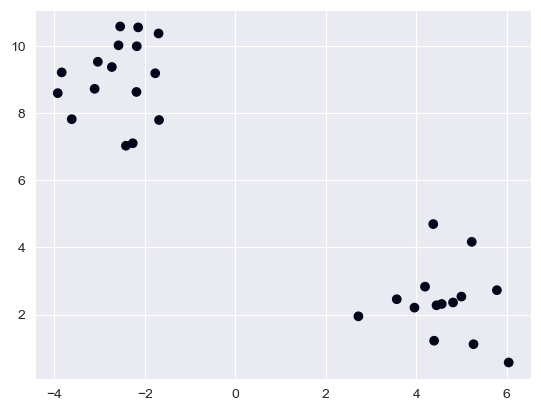

In [72]:
plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c=preds.ravel())

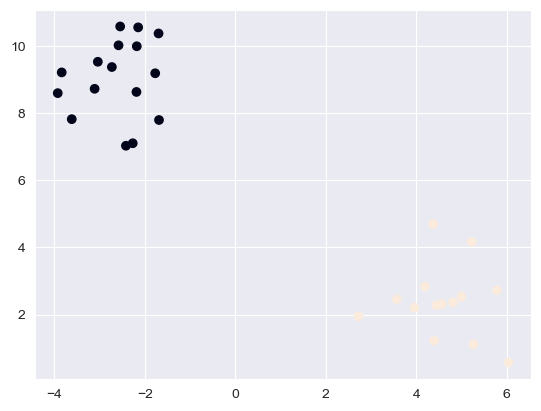

In [73]:
plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c=y_test.ravel())